In [1]:
import litebird_sim as lbs
import numpy as np
from swipe_modules import SwipeSpinScanningStrategy
import matplotlib.pyplot as plt
import healpy as hp
import astropy

In [2]:
sim = lbs.Simulation(
    start_time=astropy.time.Time("2026-08-15T16:30"),
    duration_s=36*3600,
    description="SWIPE simulation",
    random_seed=12345,
)

In [3]:
sim.set_scanning_strategy(SwipeSpinScanningStrategy(),delta_time_s=1)

site_latitude_deg, site_longitude_deg and longitude_speed_deg_per_sec used


In [4]:
instr = lbs.InstrumentInfo(
    name="swipe",
    spin_boresight_angle_rad=np.deg2rad(40),
)
sim.set_instrument(instr)

sampling_hz = 60
hwp_radpsec = 2*np.pi
nside = 256

In [5]:
det0 = lbs.DetectorInfo(
    name="Boresight_detector_0",
    sampling_rate_hz=sampling_hz,
    bandcenter_ghz=145.0,
    quat=[0.0, 0.0, 0.0, 1.0],
    fwhm_arcmin = 60.0,
    net_ukrts = 12.6999998,
)

det1 = lbs.DetectorInfo(
    name="Boresight_detector_1",
    sampling_rate_hz=sampling_hz,
    bandcenter_ghz=145.0,
    quat=[0.0, 0.0, 1.0 / np.sqrt(2.0), 1.0 / np.sqrt(2.0)],
    fwhm_arcmin = 60.0,
    net_ukrts = 12.6999998,
)

In [6]:
obs, = sim.create_observations(detectors=[det0,det1])
sim.set_hwp(lbs.IdealHWP(hwp_radpsec))
sim.prepare_pointings()
sim.precompute_pointings()

In [7]:
Mbsparams = lbs.MbsParameters(make_cmb =True,
                              make_fg = True,
                              fg_models=["pysm_ame_1","pysm_synch_0", "pysm_freefree_1","pysm_synch_0"],
                              gaussian_smooth = True,
                              bandpass_int = False,
                              nside = nside,
                             )

In [8]:
mbs = lbs.Mbs(simulation=sim,
              parameters=Mbsparams,
              detector_list=[det0,det1],
             )

In [9]:
in_map = mbs.run_all()[0]

[2024-09-04 15:18:43,008 INFO MPI#0000] generating and saving cmb simulations
[2024-09-04 15:18:43,046 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-09-04 15:18:43,046 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-09-04 15:18:43,097 INFO MPI#0000] Access data from /Users/luca/Documents/Universita/LSPE/dev_swipe_modules/swipe_modules/examples/cmb/0000/cmb_0000_date_240904.fits
[2024-09-04 15:18:43,098 INFO MPI#0000] NSIDE = 256
[2024-09-04 15:18:43,099 INFO MPI#0000] ORDERING = RING in fits file
[2024-09-04 15:18:43,099 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-09-04 15:18:43,350 INFO MPI#0000] Sigma is 25.479654 arcmin (0.007412 rad) 
[2024-09-04 15:18:43,350 INFO MPI#0000] -> fwhm is 60.000000 arcmin
[2024-09-04 15:18:43,354 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-09-04 15:18:43,354 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-09-04 15:18:43,584 INFO MPI#0000] Sigma is 25.479654 arcmin (0.007412 rad) 
[2024-09-04 15:18:43,584 INFO MPI#0000] ->

In [10]:
sim.fill_tods(in_map)

In [11]:
sim.add_noise(sim.random,"white")

In [12]:
results = sim.make_binned_map(nside)

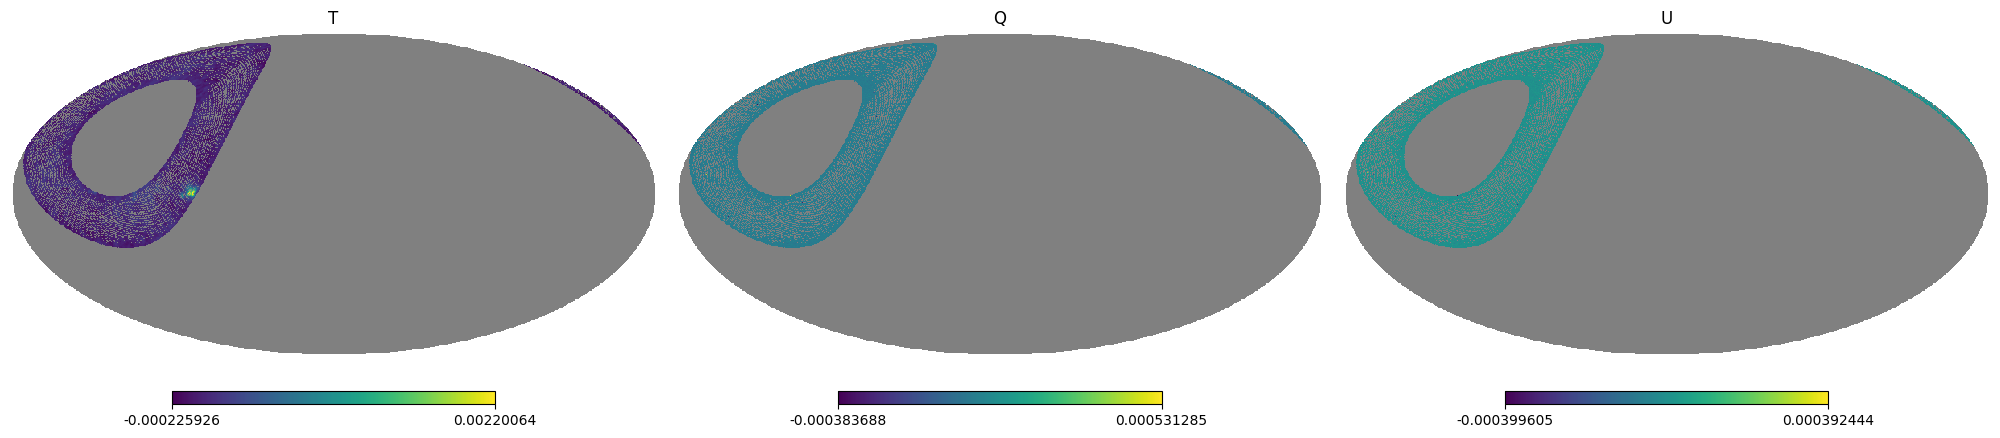

In [13]:
plt.figure(figsize=(20,7))
hp.mollview(results.binned_map[0],sub=131,title='T')
hp.mollview(results.binned_map[1],sub=132,title='Q')
hp.mollview(results.binned_map[2],sub=133,title='U')

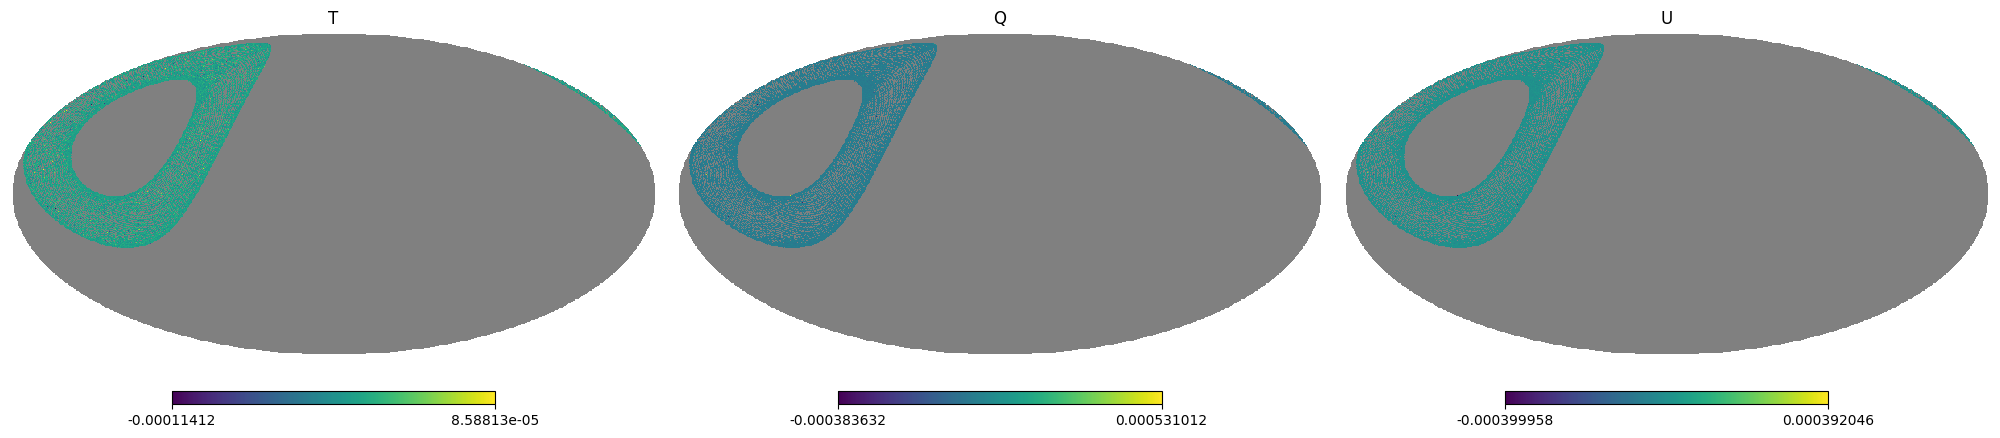

In [14]:
plt.figure(figsize=(20,7))
hp.mollview(results.binned_map[0]-in_map['Boresight_detector_0'][0],sub=131,title='T')
hp.mollview(results.binned_map[1]-in_map['Boresight_detector_0'][1],sub=132,title='Q')
hp.mollview(results.binned_map[2]-in_map['Boresight_detector_0'][2],sub=133,title='U')